# 수화 이미지 분류 경진대회 Baseline1

이번 대회는 주어진 수화 이미지의 숫자를 분류하는 대회입니다.

단순 이미지 분류 문제이지만 이미지 처리를 처음 시작하시는 분들은 아마도 막막하실 겁니다.

따라서 간단한 CNN 모델로 숫자 1, 2, 3, 4, 5, 6, 7, 8, 9, 10-1, 10-2 중 이미지들을 올바른 라벨로 분류하는 코드를 제공해드립니다.

베이스라인을 통해 이미지 처리 기초에 입문해보세요!

<!-- 이번 베이스라인 코드에서는 pytorch를 활용해 단순 CNN 모델을 사용하여 이미지 분류를 해보았습니다.
CNN 을 활용한 알고리즘은 컴퓨터 비전 분야의 기초가 되는 알고리즘입니다! 
그럼 코드와 설명을 보고 CNN 알고리즘을 이해해 봅시다! 

* 코드를 어떻게 실행시켜야 할지 잘 모르시는 분은 아래 "코랩으로 데이콘 참여하기"를 먼저 봐주세요!
https://dacon.io/competitions/official/235836/talkboard/404882

* 데이터를 살펴보는 탐색적 데이터 분석 (Exploratory Data Analysis, EDA) 코드를 먼저 보고 오시면 좋습니다.-->


## Convolutional Neural Network (CNN)
코드로 들어가기 전 먼저 간단하게 CNN 모델을 이해하기 위한 기본 개념들을 둘러보겠습니다.

## Neural Network (신경망)
신경망은 다른 말로 인공 신경망(Artificial Neural Network)이라고도 불립니다.

신경망이란 뇌 속 뉴런의 망형 구조를 닮은 다층형 구조의 컴퓨팅 모델입니다.   
여기에는 서로 연결된 처리 소자, 일명 '뉴런'이라는 것이 있으며 생물학적 뉴런을 수학적으로 모델링한 것인데,   
이들이 서로 협력하여 출력 함수를 도출합니다.   

신경망은 입력 및 출력 계층/차원으로 구성되며 대부분은 숨겨진 계층도 있습니다.   
숨겨진 계층은 입력을 출력 계층에서 사용할 수 있는 무언가로 변환해주는 단위로 구성됩니다.  
따라서 인공신경망 뉴런은 여러 입력값을 받아 일정 수준을 넘어서게 되면 활성화되고 출력값을 내보냅니다.

### 1. Activation Function (활성화 함수)

딥러닝 네트워크에서 노드에 입력된 값들을 비선형 함수에 통과시킨 후 다음 레이어로 전달하는데,    
이 때 사용하는 함수를 활성화 함수(Activation Function)라고 합니다.

선형 함수가 아니라 비선형 함수를 사용하는 이유는 딥러닝 모델의 레이어 층을 깊게 가져갈 수 있기 때문입니다.

그럼 대표적인 활성화 함수 몇가지만 보겠습니다.

#### 1) Sigmoid
Sigmoid 함수는 Logistic 함수라고 불리기도 하며, x의 값에 따라 0~1의 값을 출력하는 S자형 함수입니다.  
sigmoid 함수는 활성화 함수(Activation function)로 많이 사용되며 보통 0.5 미만은 0, 이상은 1을 출력하게 됩니다.

sigmoid(x) = 1 / 1 + exp(-x)   
그래프는 다음과 같습니다.

그러나 이런 sigmoid 함수에는 단점이 있습니다.

그래프를 보시면 양 극단 값의 기울기(미분값)이 0에 가까워져 학습이 되지 않는 문제가 발생합니다.     
이를 Gradient Vanishing 문제라고 하는데 이러한 문제를 해결하기 위해 다양한 활성화 함수들이 고안되었습니다.   

#### 2) ReLU
ReLU 함수는 그렇게 고안된 활성화 함수 중 하나로, Gradient Vanishing 문제를 해결 가능합니다.

relu(x) = 0 if x < 0 else max(0,x)
위 식과 같이 ReLU 함수는 입력값을 0과 비교해 둘 중 큰 값을 출력합니다.

따라서 계산이 빠르고 양 극단값이 포화되지 않는다는 장점이 있습니다.

그러나 여전히 음수인 경우에는 0을 출력하여 학습이 이루어지지 않는다는 단점이 존재합니다.

### 2. Perceptron (퍼셉트론)
퍼셉트론이란 신경망의 기원이 되는 개념으로, Frank Rosenblatt이 1957년 고안한 알고리즘입니다.

이는 여러 신호를 입력받아 0(흐르지 않는다) 또는 1(흐른다)이라는 출력값을 앞으로 전달합니다.

각 입력 신호 X는 각 가중치 w와 곱해집니다. 가중치가 클수록 그 신호가 중요하다는 뜻입니다.

그러나 퍼셉트론은 단순한 선형 분류기로, AND나 OR과 같은 분류는 가능하나 XOR 분류는 불가능합니다.

### 3. MLP(Multi-Layer Perceptron 다층 퍼셉트론)

직선형 영역만 표시할 수 있는 단층 퍼셉트론의 한계를 극복하기 위해 고안된 것이 다층 퍼셉트론입니다.

XOR 문제의 경우 각 영역을 직선으로 분리가 불가능한데, 비선형 영역까지 표현 가능한 다층 퍼셉트론으로 XOR 게이트까지 구현할 수 있습니다.


## 환경 설정 및 데이터 로드
이제 CNN 실습에 들어가보겠습니다.   
우선 GPU를 쓸수 있는 환경이면 GPU 부터 할당해보도록 하겠습니다.

In [1]:
import os
import torch
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu') #GPU 할당

/home/ubuntu/anaconda3/envs/world/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


하이퍼 파라미터 값을 지정하겠습니다.    
하이퍼 파라미터에 대한 설명은 진행하면서 설명드리겠습니다.

In [2]:
#하이퍼 파라미터 튜닝

CFG = {
    'IMG_SIZE':128, #이미지 사이즈
    'EPOCHS':50, #에포크
    'LEARNING_RATE':2e-2, #학습률
    'BATCH_SIZE':12, #배치사이즈
    'SEED':41, #시드
}

모델의 재현성을 위하여 random seed를 고정하겠습니다.

In [3]:
# Seed 고정
import random
import numpy as np

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(CFG['SEED'])

먼저 csv 파일을 불러와서 label이 어떻게 되어있는지 살펴보겠습니다.

In [4]:
import pandas as pd
label_df = pd.read_csv('data/train.csv')
label_df.head()

,file_name,label
0,001.png,10-2
1,002.png,10-1
2,003.png,3
3,004.png,8
4,005.png,9


In [5]:
label_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  858 non-null    object
 1   label      858 non-null    object
dtypes: object(2)
memory usage: 13.5+ KB


label이 object 타입으로 되어있는 것을 확인할 수 있습니다.   
또한 10을 나타내는 수화 사진이 10-1, 10-2로 두가지로 분류되어있는 것을 알 수 있습니다.   

## 데이터 전처리

모델링을 하기 위해 label을 정수형으로 수정해 주겠습니다.   
파이토치는 클래스의 인덱스 번호가 0부터 읽어들이기 때문에,   
10-1를 정수 10으로, 10를 정수 0으로 바꿔주고   
label 열의 타입을 int로 수정해 주겠습니다.

In [6]:
label_df['label'][label_df['label'] == '10-1'] = 10 ## label : 10-1 -> 10
label_df['label'][label_df['label'] == '10-2'] = 0 ## Label : 10-2 -> 0
label_df['label'] = label_df['label'].apply(lambda x : int(x)) ## Dtype : object -> int

In [7]:
label_df.head()

,file_name,label
0,001.png,0
1,002.png,10
2,003.png,3
3,004.png,8
4,005.png,9


In [8]:
label_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  858 non-null    object
 1   label      858 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.5+ KB


head()에서 label 열과 info()에서 Dtype을 보면    
정상적으로 수정된 것을 확인 할 수 있습니다.

그리고 데이터 이미지의 local adress와 label 값을 list에 저장해주도록 하겠습니다.

In [9]:
from glob import glob

def get_train_data(data_dir):
    img_path_list = []
    label_list = []
    
    # get image path
    img_path_list.extend(glob(os.path.join(data_dir, '*.png')))
    img_path_list.sort(key=lambda x:int(x.split('/')[-1].split('.')[0]))
        
    # get label
    #label_df = pd.read_csv(data_dir+'/train.csv')
    label_list.extend(label_df['label'])
                
    return img_path_list, label_list

def get_test_data(data_dir):
    img_path_list = []
    
    # get image path
    img_path_list.extend(glob(os.path.join(data_dir, '*.png')))
    img_path_list.sort(key=lambda x:int(x.split('/')[-1].split('.')[0]))

    
    return img_path_list

In [10]:
all_img_path, all_label = get_train_data('data/train')
test_img_path = get_test_data('data/test')

label값 상위 5개를 확인해봅시다.

In [12]:
all_label[0:5]

[0, 10, 3, 8, 9]

## CustomDataset

전체 dataset을 구성하는 단계입니다.  

In [13]:
import torchvision.datasets as datasets # 이미지 데이터셋 집합체
import torchvision.transforms as transforms # 이미지 변환 툴

from torch.utils.data import DataLoader # 학습 및 배치로 모델에 넣어주기 위한 툴
from torch.utils.data import DataLoader, Dataset

class CustomDataset(Dataset):
    def __init__(self, img_path_list, label_list, train_mode=True, transforms=None): #필요한 변수들을 선언
        self.transforms = transforms
        self.train_mode = train_mode
        self.img_path_list = img_path_list
        self.label_list = label_list

    def __getitem__(self, index): #index번째 data를 return
        img_path = self.img_path_list[index]
        # Get image data
        image = cv2.imread(img_path)
        if self.transforms is not None:
            image = self.transforms(image)

        if self.train_mode:
            label = self.label_list[index]
            return image, label
        else:
            return image
    
    def __len__(self): #길이 return
        return len(self.img_path_list)

#### Train / Validation Split

그럼 학습시킬 데이터 셋과 검증할 데이터 셋을 분리해주도록 하겠습니다.

In [14]:
# Train : Validation = 0.8 : 0.25 Split
train_len = int(len(all_img_path)*0.75)
Vali_len = int(len(all_img_path)*0.25)

train_img_path = all_img_path[:train_len]
train_label = all_label[:train_len]

vali_img_path = all_img_path[train_len:]
vali_label = all_label[train_len:]

In [15]:
print('train set 길이 : ', train_len)
print('vaildation set 길이 : ', Vali_len)

train set 길이 :  643
vaildation set 길이 :  214


train set은 643개, vaildation set은 214개로 나뉘어진 것을 확인할 수 있습니다.  
그럼 나뉜 데이터 셋에서 이미지를 분석 하기 위해 이미지 변형(transform)을 적용해보도록 하겠습니다.

In [16]:
train_transform = transforms.Compose([
                    transforms.ToPILImage(), #Numpy배열에서 PIL이미지로
                    transforms.Resize([CFG['IMG_SIZE'], CFG['IMG_SIZE']]), #이미지 사이즈 변형
                    transforms.ToTensor(), #이미지 데이터를 tensor
                    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)) #이미지 정규화
                    
                    ])

test_transform = transforms.Compose([
                    transforms.ToPILImage(),
                    transforms.Resize([CFG['IMG_SIZE'], CFG['IMG_SIZE']]),
                    transforms.ToTensor(),
                    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
                    ])

## Dataloader
Dataloader class는 batch기반의 딥러닝모델 학습을 위해서 mini batch를 만들어주는 역할을 합니다. 

dataloader를 통해 dataset의 전체 데이터가 batch size로 나뉘게 됩니다. 

만들었던 dataset을 input으로 넣어주면 여러 옵션(데이터 묶기, 섞기, 알아서 병렬처리)을 통해 batch를 만들어 내는 것입니다.

In [17]:
# Get Dataloader

#CustomDataset class를 통하여 train dataset생성
train_dataset = CustomDataset(train_img_path, train_label, train_mode=True, transforms=train_transform) 
#만든 train dataset를 DataLoader에 넣어 batch 만들기
train_loader = DataLoader(train_dataset, batch_size = CFG['BATCH_SIZE'], shuffle=True, num_workers=0) #BATCH_SIZE : 24

#vaildation 에서도 적용
vali_dataset = CustomDataset(vali_img_path, vali_label, train_mode=True, transforms=test_transform)
vali_loader = DataLoader(vali_dataset, batch_size = CFG['BATCH_SIZE'], shuffle=False, num_workers=0)

In [18]:
train_batches = len(train_loader)
vali_batches = len(vali_loader)

print('total train imgs :',train_len,'/ total train batches :', train_batches)
print('total valid imgs :',Vali_len, '/ total valid batches :', vali_batches)

total train imgs : 643 / total train batches : 54
total valid imgs : 214 / total valid batches : 18


배치 사이즈가 24이므로    
train은 54 묶음 vaildation은 18 묶음으로 묶인 것을 볼 수 있습니다.

## 이미지 및 shape 확인

Dataloader를 통해서 이미지가 잘 넣어졌는지 확인해보도록 해보겠습니다.    


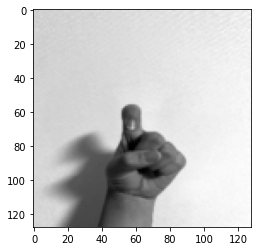

Label: 10


In [19]:
import cv2
import matplotlib.pyplot as plt

train_features, train_labels = next(iter(train_loader)) #iter는 반복 가능한 객체에서 이터레이터를 반환하고, 
                                                        #next는 이터레이터에서 값을 차례대로 꺼냅니다. 
img = train_features[0]
label = train_labels[0]
plt.imshow(img[0], cmap="gray")
plt.show()
print(f"Label: {label}")

이미지와 라벨이 정상적으로 출력된 것을 확인했습니다.

그럼 torch의 shape가 옳바르게 입력이 되었는지 확인해보도록 하겠습니다.

In [20]:
print(f"Feature batch shape: {train_features.size()}")
print(f"Batch Labels shape: {train_labels}")

Feature batch shape: torch.Size([12, 3, 128, 128])
Batch Labels shape: tensor([10, 10,  4,  2,  1,  9,  4,  2, 10,  9,  1, 10])


torch.Size([12, 3, 128, 128])는 (batch_size, channels, high, width)를 의미합니다.   
Label의 shape를 보면 정상적으로 배치사이즈(12)만큼 나오는 것을 확인할 수 있습니다.

## 모델 구조 정의

이제 CNN 모델을 학습시키기 위한 데이터가 준비되었다면   
모델 구조를 설정하는 단계로 넘어가겠습니다.

In [21]:
from tqdm.auto import tqdm
import torch.nn as nn # 신경망들이 포함됨
#import torch.nn.init as init # 텐서에 초기값을 줌

class CNNclassification(torch.nn.Module):
    def __init__(self):
        super(CNNclassification, self).__init__()
        self.layer1 = torch.nn.Sequential(
            nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1), #cnn layer
            nn.ReLU(), #activation function
            nn.MaxPool2d(kernel_size=2, stride=2)) #pooling layer
        
        self.layer2 = torch.nn.Sequential(
            nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1), #cnn layer
            nn.ReLU(), #activation function
            nn.MaxPool2d(kernel_size=2, stride=2)) #pooling layer
        
        self.layer3 = torch.nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1), #cnn layer
            nn.ReLU(), #activation function
            nn.MaxPool2d(kernel_size=2, stride=2)) #pooling layer
        
        self.layer4 = torch.nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=4, stride=1, padding=1), #cnn layer
            nn.ReLU(), #activation function
            nn.MaxPool2d(kernel_size=2, stride=2)) #pooling layer
        
        self.fc_layer = nn.Sequential( 
            nn.Linear(3136, 11) #fully connected layer(ouput layer)
        )    
        
    def forward(self, x):
        
        x = self.layer1(x) #1층
        
        x = self.layer2(x) #2층
         
        x = self.layer3(x) #3층
        
        x = self.layer4(x) #4층
        
        x = torch.flatten(x, start_dim=1) # N차원 배열 -> 1차원 배열
        
        out = self.fc_layer(x)
        return out

### Convoultion Layer

Convolution Layer에서는 이미지의 특징(feature map)을 추출해내는 역할을 합니다.   

입력 데이터가 주어지면 필터를 이용해 특징을 추출한 다음 아웃풋을 내보냅니다.   

이 필터는 커널(Kernel) 혹은 가중치의 배열이라고도 부르며 이 값을 조정하는 것이 곧 학습을 의미합니다.   

첫번째 Convolution Layer에서는 3x3 크기의 커널을 사용했습니다. 이는 곧 학습해야 할 가중치가 9개라는 뜻입니다.   
  
### Stride   
커널을 이동시키는 거리입니다. 특별한 언급이 없다면 1로 가정합니다.   

Convolution을 하게되면 입력 데이터의 크기가 자연스럽게 줄어들게 되는데, 

주변에 값이 0인 셀들을 추가(Padding)해서 입력 데이터의 크기를 유지시키기도 합니다.

### Padding
zero padding은 이미지 주위에 0을 둘러서 이미지 데이터의 축소를 방지해주는 역할을 합니다.

필터로 인해 특징이 추출되면 자연스럽게 크기가 작아지는데, 

이미지 벡터들 가장자리에 0을 채워 Convolution Layer를 통과할 때 크기를 동일하게 유지시켜줄 수 있습니다.

### ReLU
앞서 도입부에서 말씀 드린 것 처럼, ReLU는 활성화 함수 중 하나입니다.

Gradient Vanishing 문제를 해결 가능하고 계산이 빠르고 양 극단값이 포화되지 않는다는 장점이 있습니다.

### Pooling Layer - Max Pooling

Pooling Layer는 데이터의 공간적 크기를 축소하는데 사용합니다.

보통 이 레이어에서 이미지의 크기를 조절하며, CNN에서는 주로 Max-Pooling 방식을 사용합니다.

Conv layer 는 이미지의 특정 영역의 특징을 잡아내는 역할이라면, 

Pooling 은 이미지의 크기를 줄이는 동시에 이미지의 전체의 특징 또한 보존합니다.

따라서 Pooling 은 모델로 하여금 이미지 전체를 볼 수 있게 도와줍니다.

Max Pooling에서는 선택된 영역에서 가장 큰 값을 뽑아 대표값으로 설정하는 방식입니다.

이를 통해 학습 시간을 단축하고 오버피팅 문제를 완화할 수 있습니다.

### Fully Connected (output) Layer

이전 레이어의 출력을 평탄화하여 다음 스테이지의 입력이 될 수 있는 단일 벡터로 변환합니다.

마지막으로 각 라벨에 대한 최종 확률을 제공합니다.

## 모델 학습

이제 모델 학습을 하기 위해 매개변수를 정의해보도록 하겠습니다.

In [22]:
import torch.optim as optim # 최적화 알고리즘들이 포함힘

model = CNNclassification().to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model.parameters(), lr = CFG["LEARNING_RATE"])
scheduler = None

이번 베이스라인에서는 모델은 기본 CNN classification 모델을 사용했습니다.

### Loss Function

손실함수로는 classification 문제이기 때문에 'CrossEntropyLoss'를 사용했습니다.

손실함수는 실제 값과 모델이 예측한 값의 거리를 출력하는 함수 입니다.

쉽게 말해 손실함수는 모델의 예측이 얼마나 틀렸는지를 알려주는 함수 입니다.

이 때 "모델의 예측이 얼마나 틀렸는지" 를 어떻게 정의하느냐에 따라 어떤 Loss Function 을 사용할 지가 정해지는 것 입니다.

### Optimizer 

최적화 함수로는 확률적 경사 하강법인 'SGD(Stochastic Gradient Descent)'를 사용했습니다. 

Optimizer는 학습 데이터(Train data)셋을 이용하여 모델을 학습 할 때 데이터의 실제 결과와 모델이 예측한 결과를 기반으로 잘 줄일 수 있게 만들어주는 역할을 합니다.

여기서 learning rate, 학습률은 얼마나 빠른속도로 이동할것이냐 입니다.

learning rate를 엄청 크게 설정한다면 원하는 값까지 빠르게 도달할 수 있지만 자칫하면 오히려 최소값을 계산하도록 수렴하지 못합니다.

반면 너무 작은 경우는 시간이 매우 오래걸립니다.

따라서 적절한 learning rate설정이 중요합니다.

이제 train 메소드를 통하여 train을 학습 시켜 vaildation으로 평가하는 메소드를 작성해보겠습니다.

In [23]:
def train(model, optimizer, train_loader, scheduler, device): 
    model.to(device)
    n = len(train_loader)
    
    #Loss Function 정의
    criterion = nn.CrossEntropyLoss().to(device)
    best_acc = 0
    
    for epoch in range(1,CFG["EPOCHS"]+1): #에포크 설정
        model.train() #모델 학습
        running_loss = 0.0
            
        for img, label in tqdm(iter(train_loader)):
            img, label = img.to(device), label.to(device) #배치 데이터
            optimizer.zero_grad() #배치마다 optimizer 초기화
        
            # Data -> Model -> Output
            logit = model(img) #예측값 산출
            loss = criterion(logit, label) #손실함수 계산
            
            # 역전파
            loss.backward() #손실함수 기준 역전파 
            optimizer.step() #가중치 최적화
            running_loss += loss.item()
              
        print('[%d] Train loss: %.10f' %(epoch, running_loss / len(train_loader)))
        
        if scheduler is not None:
            scheduler.step()
            
        #Validation set 평가
        model.eval() #evaluation 과정에서 사용하지 않아야 하는 layer들을 알아서 off 시키도록 하는 함수
        vali_loss = 0.0
        correct = 0
        with torch.no_grad(): #파라미터 업데이트 안하기 때문에 no_grad 사용
            for img, label in tqdm(iter(vali_loader)):
                img, label = img.to(device), label.to(device)

                logit = model(img)
                vali_loss += criterion(logit, label)
                pred = logit.argmax(dim=1, keepdim=True)  #11개의 class중 가장 값이 높은 것을 예측 label로 추출
                correct += pred.eq(label.view_as(pred)).sum().item() #예측값과 실제값이 맞으면 1 아니면 0으로 합산
        vali_acc = 100 * correct / len(vali_loader.dataset)
        print('Vail set: Loss: {:.4f}, Accuracy: {}/{} ( {:.0f}%)\n'.format(vali_loss / len(vali_loader), correct, len(vali_loader.dataset), 100 * correct / len(vali_loader.dataset)))
        
        #베스트 모델 저장
        if best_acc < vali_acc:
            best_acc = vali_acc
            torch.save(model.state_dict(), './saved/best_model.pth') #이 디렉토리에 best_model.pth을 저장
            print('Model Saved.')

classification 문제이기 때문에 평가지표로는 Accuarcy를 사용하여 모델의 정확도를 산출하였습니다.

### epoch
딥러닝에서 epoch는 전체 트레이닝 셋이 신경망을 통과한 횟수입니다.

1-epoch는 전체 트레이닝 셋이 하나의 신경망에 적용되어 순전파와 역전파를 통해 신경망을 한 번 통과했다는 뜻입니다.

epoch 은 많을 수록 학습이 잘되는 것이 아닙니다.

epoch 이 너무 적을 경우 학습이 덜 이루어지는 경우가 있고, epoch 이 너무 많을 경우 과적합이 되는 경우가 있습니다.

따라서 적절한 epoch 을 설정해 주어야 합니다.

이때 validation loss 와 accuracy 은 epoch 을 언제 중단 할지 모니터링 하는 용도로 사용되기도 합니다.

### batch size
batch size란 cpu 또는 gpu 연산 시, 하드웨어로 로드되는 데이터의 개수 입니다.

본인의 컴퓨팅 환경에 따라 batch size 를 조절하는 것이 좋습니다.

gpu 를 사용하는 경우 본인의 gpu 메모리 용량을 고려하여 batch size 를 설정해 주어야 합니다.

batch size 는 모델 학습 과정에 영향을 끼치기도 합니다.

따라서 하드웨어 상황을 고려하면서도 학습 과정 또한 고려하여 batch size 를 설정해 주어야 합니다.

### Backpropagation (역전파)
Backpropagation 오차 역전파법이라고도 하며 예측값과 실제값의 차이인 오차를 계산하고,

이것을 다시 역으로 전파하여 가중치를 수정하여 오차가 작아지는 방향으로 일정 횟수를 반복해 수정하는 방법입니다.

이때, 역전파 과정에서는 앞서 언급했던 최적화 함수를 이용합니다.

In [24]:
train(model, optimizer, train_loader, scheduler, device)

100%|██████████| 54/54 [00:02<00:00, 24.95it/s]


[1] Train loss: 2.3990958355


100%|██████████| 18/18 [00:00<00:00, 31.59it/s]


vail set: Loss: 2.3985, Accuracy: 19/215 ( 9%)

Model Saved.


100%|██████████| 54/54 [00:01<00:00, 30.35it/s]


[2] Train loss: 2.3950800896


100%|██████████| 18/18 [00:00<00:00, 32.71it/s]


vail set: Loss: 2.3998, Accuracy: 22/215 ( 10%)

Model Saved.


100%|██████████| 54/54 [00:01<00:00, 29.89it/s]


[3] Train loss: 2.3917728486


100%|██████████| 18/18 [00:00<00:00, 32.56it/s]


vail set: Loss: 2.4014, Accuracy: 20/215 ( 9%)



100%|██████████| 54/54 [00:01<00:00, 30.31it/s]


[4] Train loss: 2.3889375307


100%|██████████| 18/18 [00:00<00:00, 32.68it/s]


vail set: Loss: 2.4024, Accuracy: 22/215 ( 10%)



100%|██████████| 54/54 [00:01<00:00, 30.30it/s]


[5] Train loss: 2.3854556525


100%|██████████| 18/18 [00:00<00:00, 32.67it/s]


vail set: Loss: 2.4018, Accuracy: 19/215 ( 9%)



100%|██████████| 54/54 [00:01<00:00, 30.31it/s]


[6] Train loss: 2.3786994131


100%|██████████| 18/18 [00:00<00:00, 33.04it/s]


vail set: Loss: 2.4056, Accuracy: 20/215 ( 9%)



100%|██████████| 54/54 [00:01<00:00, 30.02it/s]


[7] Train loss: 2.3734241547


100%|██████████| 18/18 [00:00<00:00, 32.91it/s]


vail set: Loss: 2.3991, Accuracy: 25/215 ( 12%)

Model Saved.


100%|██████████| 54/54 [00:01<00:00, 30.26it/s]


[8] Train loss: 2.3614098893


100%|██████████| 18/18 [00:00<00:00, 32.83it/s]


vail set: Loss: 2.3854, Accuracy: 28/215 ( 13%)

Model Saved.


100%|██████████| 54/54 [00:01<00:00, 30.40it/s]


[9] Train loss: 2.3384028850


100%|██████████| 18/18 [00:00<00:00, 32.89it/s]


vail set: Loss: 2.3693, Accuracy: 23/215 ( 11%)



100%|██████████| 54/54 [00:01<00:00, 30.33it/s]


[10] Train loss: 2.3071341073


100%|██████████| 18/18 [00:00<00:00, 32.88it/s]


vail set: Loss: 2.3348, Accuracy: 33/215 ( 15%)

Model Saved.


100%|██████████| 54/54 [00:01<00:00, 30.34it/s]


[11] Train loss: 2.2390962177


100%|██████████| 18/18 [00:00<00:00, 32.05it/s]


vail set: Loss: 2.5099, Accuracy: 34/215 ( 16%)

Model Saved.


100%|██████████| 54/54 [00:01<00:00, 29.73it/s]


[12] Train loss: 2.1462465547


100%|██████████| 18/18 [00:00<00:00, 32.60it/s]


vail set: Loss: 2.1650, Accuracy: 54/215 ( 25%)

Model Saved.


100%|██████████| 54/54 [00:01<00:00, 29.56it/s]


[13] Train loss: 1.9972651027


100%|██████████| 18/18 [00:00<00:00, 32.77it/s]


vail set: Loss: 2.0707, Accuracy: 64/215 ( 30%)

Model Saved.


100%|██████████| 54/54 [00:01<00:00, 30.50it/s]


[14] Train loss: 1.8330704128


100%|██████████| 18/18 [00:00<00:00, 32.64it/s]


vail set: Loss: 1.8931, Accuracy: 72/215 ( 33%)

Model Saved.


100%|██████████| 54/54 [00:01<00:00, 30.32it/s]


[15] Train loss: 1.5920913021


100%|██████████| 18/18 [00:00<00:00, 32.96it/s]


vail set: Loss: 1.8520, Accuracy: 87/215 ( 40%)

Model Saved.


100%|██████████| 54/54 [00:01<00:00, 30.42it/s]


[16] Train loss: 1.3868308818


100%|██████████| 18/18 [00:00<00:00, 32.64it/s]


vail set: Loss: 2.0116, Accuracy: 90/215 ( 42%)

Model Saved.


100%|██████████| 54/54 [00:01<00:00, 30.37it/s]


[17] Train loss: 1.1543905360


100%|██████████| 18/18 [00:00<00:00, 32.94it/s]


vail set: Loss: 1.7074, Accuracy: 98/215 ( 46%)

Model Saved.


100%|██████████| 54/54 [00:01<00:00, 30.21it/s]


[18] Train loss: 0.9048620545


100%|██████████| 18/18 [00:00<00:00, 32.99it/s]


vail set: Loss: 1.5065, Accuracy: 110/215 ( 51%)

Model Saved.


100%|██████████| 54/54 [00:01<00:00, 30.42it/s]


[19] Train loss: 0.7543352878


100%|██████████| 18/18 [00:00<00:00, 32.85it/s]


vail set: Loss: 1.6449, Accuracy: 104/215 ( 48%)



100%|██████████| 54/54 [00:01<00:00, 30.19it/s]


[20] Train loss: 0.5861641003


100%|██████████| 18/18 [00:00<00:00, 31.14it/s]


vail set: Loss: 1.6692, Accuracy: 116/215 ( 54%)

Model Saved.


100%|██████████| 54/54 [00:01<00:00, 30.08it/s]


[21] Train loss: 0.4914722887


100%|██████████| 18/18 [00:00<00:00, 32.48it/s]


vail set: Loss: 1.8823, Accuracy: 131/215 ( 61%)

Model Saved.


100%|██████████| 54/54 [00:01<00:00, 29.75it/s]


[22] Train loss: 0.4204009486


100%|██████████| 18/18 [00:00<00:00, 32.39it/s]


vail set: Loss: 2.6641, Accuracy: 109/215 ( 51%)



100%|██████████| 54/54 [00:01<00:00, 29.82it/s]


[23] Train loss: 0.3662158478


100%|██████████| 18/18 [00:00<00:00, 32.33it/s]


vail set: Loss: 1.8896, Accuracy: 113/215 ( 53%)



100%|██████████| 54/54 [00:01<00:00, 30.05it/s]


[24] Train loss: 0.2596976657


100%|██████████| 18/18 [00:00<00:00, 32.19it/s]


vail set: Loss: 1.9665, Accuracy: 124/215 ( 58%)



100%|██████████| 54/54 [00:01<00:00, 29.83it/s]


[25] Train loss: 0.1858245398


100%|██████████| 18/18 [00:00<00:00, 32.47it/s]


vail set: Loss: 2.0345, Accuracy: 134/215 ( 62%)

Model Saved.


100%|██████████| 54/54 [00:01<00:00, 30.32it/s]


[26] Train loss: 0.1892659127


100%|██████████| 18/18 [00:00<00:00, 32.88it/s]


vail set: Loss: 1.9011, Accuracy: 128/215 ( 60%)



100%|██████████| 54/54 [00:01<00:00, 30.37it/s]


[27] Train loss: 0.2429799423


100%|██████████| 18/18 [00:00<00:00, 32.84it/s]


vail set: Loss: 2.1714, Accuracy: 135/215 ( 63%)

Model Saved.


100%|██████████| 54/54 [00:01<00:00, 30.40it/s]


[28] Train loss: 0.2338796916


100%|██████████| 18/18 [00:00<00:00, 32.83it/s]


vail set: Loss: 1.9932, Accuracy: 124/215 ( 58%)



100%|██████████| 54/54 [00:01<00:00, 30.34it/s]


[29] Train loss: 0.1182234157


100%|██████████| 18/18 [00:00<00:00, 32.04it/s]


vail set: Loss: 2.2215, Accuracy: 134/215 ( 62%)



100%|██████████| 54/54 [00:01<00:00, 30.62it/s]


[30] Train loss: 0.0762101513


100%|██████████| 18/18 [00:00<00:00, 33.02it/s]


vail set: Loss: 2.3545, Accuracy: 128/215 ( 60%)



100%|██████████| 54/54 [00:01<00:00, 30.37it/s]


[31] Train loss: 0.1231871031


100%|██████████| 18/18 [00:00<00:00, 33.04it/s]


vail set: Loss: 2.1000, Accuracy: 131/215 ( 61%)



100%|██████████| 54/54 [00:01<00:00, 30.35it/s]


[32] Train loss: 0.0690077979


100%|██████████| 18/18 [00:00<00:00, 33.09it/s]


vail set: Loss: 2.2980, Accuracy: 130/215 ( 60%)



100%|██████████| 54/54 [00:01<00:00, 30.39it/s]


[33] Train loss: 0.0627026581


100%|██████████| 18/18 [00:00<00:00, 32.91it/s]


vail set: Loss: 2.6845, Accuracy: 120/215 ( 56%)



100%|██████████| 54/54 [00:01<00:00, 30.63it/s]


[34] Train loss: 0.0582659478


100%|██████████| 18/18 [00:00<00:00, 32.24it/s]


vail set: Loss: 2.4990, Accuracy: 131/215 ( 61%)



100%|██████████| 54/54 [00:01<00:00, 30.52it/s]


[35] Train loss: 0.0530867253


100%|██████████| 18/18 [00:00<00:00, 32.68it/s]


vail set: Loss: 2.3696, Accuracy: 134/215 ( 62%)



100%|██████████| 54/54 [00:01<00:00, 30.39it/s]


[36] Train loss: 0.0481423317


100%|██████████| 18/18 [00:00<00:00, 32.96it/s]


vail set: Loss: 2.3518, Accuracy: 137/215 ( 64%)

Model Saved.


100%|██████████| 54/54 [00:01<00:00, 30.24it/s]


[37] Train loss: 0.0315856207


100%|██████████| 18/18 [00:00<00:00, 32.76it/s]


vail set: Loss: 2.4790, Accuracy: 134/215 ( 62%)



100%|██████████| 54/54 [00:01<00:00, 29.56it/s]


[38] Train loss: 0.0600861607


100%|██████████| 18/18 [00:00<00:00, 33.01it/s]


vail set: Loss: 2.2904, Accuracy: 131/215 ( 61%)



100%|██████████| 54/54 [00:01<00:00, 30.60it/s]


[39] Train loss: 0.0293994187


100%|██████████| 18/18 [00:00<00:00, 32.93it/s]


vail set: Loss: 2.3698, Accuracy: 134/215 ( 62%)



100%|██████████| 54/54 [00:01<00:00, 30.63it/s]


[40] Train loss: 0.0262167305


100%|██████████| 18/18 [00:00<00:00, 32.94it/s]


vail set: Loss: 2.3994, Accuracy: 135/215 ( 63%)



100%|██████████| 54/54 [00:01<00:00, 30.53it/s]


[41] Train loss: 0.0130486367


100%|██████████| 18/18 [00:00<00:00, 32.59it/s]


vail set: Loss: 2.4703, Accuracy: 132/215 ( 61%)



100%|██████████| 54/54 [00:01<00:00, 30.18it/s]


[42] Train loss: 0.0315722353


100%|██████████| 18/18 [00:00<00:00, 32.49it/s]


vail set: Loss: 2.3426, Accuracy: 133/215 ( 62%)



100%|██████████| 54/54 [00:01<00:00, 30.05it/s]


[43] Train loss: 0.0105302192


100%|██████████| 18/18 [00:00<00:00, 32.71it/s]


vail set: Loss: 2.4930, Accuracy: 136/215 ( 63%)



100%|██████████| 54/54 [00:01<00:00, 30.26it/s]


[44] Train loss: 0.0174331762


100%|██████████| 18/18 [00:00<00:00, 32.91it/s]


vail set: Loss: 2.4405, Accuracy: 133/215 ( 62%)



100%|██████████| 54/54 [00:01<00:00, 30.50it/s]


[45] Train loss: 0.0058947541


100%|██████████| 18/18 [00:00<00:00, 32.97it/s]


vail set: Loss: 2.6049, Accuracy: 135/215 ( 63%)



100%|██████████| 54/54 [00:01<00:00, 30.44it/s]


[46] Train loss: 0.0033302692


100%|██████████| 18/18 [00:00<00:00, 32.91it/s]


vail set: Loss: 2.7013, Accuracy: 135/215 ( 63%)



100%|██████████| 54/54 [00:01<00:00, 30.45it/s]


[47] Train loss: 0.0020024858


100%|██████████| 18/18 [00:00<00:00, 32.94it/s]


vail set: Loss: 2.7750, Accuracy: 133/215 ( 62%)



100%|██████████| 54/54 [00:01<00:00, 30.37it/s]


[48] Train loss: 0.0016823838


100%|██████████| 18/18 [00:00<00:00, 32.54it/s]


vail set: Loss: 2.8435, Accuracy: 134/215 ( 62%)



100%|██████████| 54/54 [00:01<00:00, 29.56it/s]


[49] Train loss: 0.0014400826


100%|██████████| 18/18 [00:00<00:00, 32.47it/s]


vail set: Loss: 2.9005, Accuracy: 134/215 ( 62%)



100%|██████████| 54/54 [00:01<00:00, 30.16it/s]


[50] Train loss: 0.0012810857


100%|██████████| 18/18 [00:00<00:00, 32.78it/s]

vail set: Loss: 2.9524, Accuracy: 134/215 ( 62%)



에포크가 36일때 Vaildation Accuracy가 64%로 best_model에 선정되어 저장되었습니다.

## 추론하기

이제 학습된 best_model을 가지고 test 셋의 라벨을 추론해보도록 하겠습니다.

In [25]:
def predict(model, test_loader, device):
    model.eval()
    model_pred = []
    with torch.no_grad():
        for img in tqdm(iter(test_loader)):
            img = img.to(device)

            pred_logit = model(img)
            pred_logit = pred_logit.argmax(dim=1, keepdim=True).squeeze(1)

            model_pred.extend(pred_logit.tolist())
    return model_pred

In [26]:
test_dataset = CustomDataset(test_img_path, None, train_mode=False, transforms=test_transform)
test_loader = DataLoader(test_dataset, batch_size = CFG['BATCH_SIZE'], shuffle=False, num_workers=0)

# Validation Accuracy가 가장 뛰어난 모델을 불러옵니다.
checkpoint = torch.load('./saved/best_model.pth')
model = CNNclassification().to(device)
model.load_state_dict(checkpoint)

# Inference
preds = predict(model, test_loader, device)
preds[0:5]

100%|██████████| 18/18 [00:00<00:00, 31.94it/s]


[1, 8, 1, 1, 9]

값이 배열안에 정상적으로 잘 들어간 것을 확인할 수 있습니다.

## 제출하기

submission에 예측한 값 preds를 넣어줍시다

In [27]:
submission = pd.read_csv('data/sample_submission.csv')
submission['label'] = preds

이제 제출을 위해 라벨을 다시 복원 시켜 줍니다.

앞서 10-1을 10으로, 10-2를 0으로 바꿔주었던 값을 다시 원래의 값으로 바꿔주겠습니다.

또한 label 열의 타입을 int에서 object로 수정해 주겠습니다.

In [28]:
submission['label'][submission['label'] == 10] = '10-1' ## label : 10 -> '10-1'
submission['label'][submission['label'] == 0] = '10-2' ## Label : 0 -> '10-2'
submission['label'] = submission['label'].apply(lambda x : str(x)) ## Dtype : int -> object

/tmp/ipykernel_24239/3411836075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['label'][submission['label'] == 10] = '10-1' ## label : 10 -> '10-1'


In [29]:
submission.head()

,file_name,label
0,001.png,1
1,002.png,8
2,003.png,1
3,004.png,1
4,005.png,9


submission을 csv 파일로 저장합니다.   

index=False란 추가적인 id를 부여할 필요가 없다는 뜻입니다.   

정확한 채점을 위해 꼭 index=False를 넣어주세요.

In [30]:
submission.to_csv('submit.csv', index=False)

이렇게 생성된 submission.csv 파일을 데이콘 대회 페이지에 업로드 & 제출하여 결과를 확인해보세요!

문제를 해결하기 위한 여러분의 방법을 코드 공유 게시판에 공유해주세요

좋아요와 댓글을 합산하여 가장 높은 점수를 얻으신 분께 데이콘 후드가 제공됩니다!